# **Pandemic Impact: COVID-19 and World Happiness**
-------------------------------------------------

**AIM**

Investigating the relation Between Country-Specific COVID-19 Rates and World Happiness Index
Scores to Understand the Impact of the Pandemic on Societal Well-being.

**DATASET DESCRIPTION**

This project combines two datasets: the COVID-19 dataset from the WHO website and the World Happiness Report dataset from Kaggle. The former provides COVID-19 rates for countries, while the latter offers happiness scores.

In [1]:
#mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# #Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# #Read COVID-19 dataset
covid_data = pd.read_csv('/content/drive/MyDrive/COVID19-Data-Analysis-Using-Python-master/covid19_Confirmed_dataset.csv')
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Data Preprocessing

## A. Pre-processing COVID-19 Dataset

In [4]:
#checking dataframe shape
covid_data.shape

(266, 104)

In [5]:
#Checking column names
columns = covid_data.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [6]:
#check missing values
covid_data.isna().sum()

,0
Province/State,184
Country/Region,0
Lat,0
Long,0
1/22/20,0
...,...
4/26/20,0
4/27/20,0
4/28/20,0
4/29/20,0


Interpretation :

There is no missing values in the dataset except for Province/State Field

In [7]:
#check duplicates - duplicate rows should be removed.
#True -> there are duplicate rows
#False -> There are no duplicate rows
covid_data.duplicated().any()

False

Interpretation :

Dataset does not have duplicate rows

In [8]:
# Remove Unnecessary Columns
#Latitude and Longitude colums are irrelevent for the context.Hence this can be␣ removed
covid_data.drop(['Lat','Long'],axis = 1, inplace=True)
print(covid_data.columns)

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=102)


In [9]:
# Group records based on country name
covid_data_grouped = covid_data.groupby('Country/Region').sum()
covid_data_grouped.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
 #Checking shape of grouped dataframe
covid_data_grouped.shape

(187, 101)

In [11]:
# Find total infected cases in all countries
countries = list(covid_data_grouped.index)
infection_count = []

for c in countries:
    # Convert Series to numeric and sum only numeric values
    infection_count.append(pd.to_numeric(covid_data_grouped.loc[c], errors='coerce').sum())

print(infection_count)


[28462, 17864, 74325, 21893, 649, 678, 84105, 40610, 224354.0, 502063, 37281, 1677, 56608, 70829, 2326, 150475, 1082648, 429, 1246, 213, 15387, 36234, 444, 1085638, 5777, 29366, 17131, 2463, 185, 1472, 4842, 31564, 982149.0, 485, 832, 282177, 6686938.0, 107654, 1, 3516, 9281, 20853, 21985, 56068, 26458, 21935, 209985, 236274.0, 53404, 16408, 539, 122072, 337630, 90542, 5489, 2997, 1092, 48428, 918, 2761, 511, 112892, 4132964.0, 3192, 268, 11027, 4531683, 25175, 77726, 481, 7645, 16059, 1541, 1703, 1461, 305, 14128, 52370, 61442, 457945, 176940, 2783401, 48863, 389169, 393611, 6139613, 5393, 282573, 14237, 48155, 7633, 572513, 11608, 55693, 13847, 553, 23426, 24136, 2097, 1213, 3065, 37109, 116527, 278, 3414, 528, 173243, 2808, 6004, 12806, 250, 9755, 237643, 65045, 3040, 934, 8890, 75625, 1118, 569, 884, 949574.0, 42498, 302, 15202, 20351, 31559, 251779, 33924, 245996, 120004, 151, 5592, 418646, 175219, 251454, 579961, 167128, 237705, 1141721, 4844, 410, 508, 347, 15518, 118, 274362, 1

In [12]:
# Adding new columns of highest and lowest infection rates for all countries
covid_data_grouped["Total Infections"] = infection_count
covid_data_grouped.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Total Infections
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,28462.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,17864.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,74325.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,21893.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,649.0


In [13]:
#Creating new dataframe with only required fields
country_covid_rate_df = pd.DataFrame(covid_data_grouped["Total Infections"])
country_covid_rate_df.head()

,Total Infections
Country/Region,
Afghanistan,28462.0
Albania,17864.0
Algeria,74325.0
Andorra,21893.0
Angola,649.0


## B. Pre-processing World Happiness Index Dataset

In [14]:
#Importing happiness index dataset
happiness_index_data = pd.read_csv("/content/drive/MyDrive/COVID19-Data-Analysis-Using-Python-master/happiness_index.csv")
happiness_index_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
#Checking Missing Values
happiness_index_data.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


Interpretation :

There is no missing values in the dataset.

In [16]:
#Checking Duplicate Rows
happiness_index_data.duplicated().any()

False

Interpretation :

There is no missing values in the dataset.

In [17]:
#Removing not required Columns
remove_columns = ["Overall rank","Score","Generosity"]
happiness_index_data.drop(remove_columns, axis=1, inplace=True)
happiness_index_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.410
2,Norway,1.488,1.582,1.028,0.603,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.298


In [18]:
#Changing dataframe index to country name
happiness_index_data.set_index("Country or region", inplace=True)
happiness_index_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.393
Denmark,1.383,1.573,0.996,0.592,0.410
Norway,1.488,1.582,1.028,0.603,0.341
Iceland,1.380,1.624,1.026,0.591,0.118
Netherlands,1.396,1.522,0.999,0.557,0.298


## C. Joining Covid Dataset and Happiness Index Dataset

In [19]:
#COVID Dataset
country_covid_rate_df.head()

,Total Infections
Country/Region,
Afghanistan,28462.0
Albania,17864.0
Algeria,74325.0
Andorra,21893.0
Angola,649.0


In [20]:
#Shape of COVID dataset
country_covid_rate_df.shape

(187, 1)

In [21]:
#World Happiness index dataset
happiness_index_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.393
Denmark,1.383,1.573,0.996,0.592,0.410
Norway,1.488,1.582,1.028,0.603,0.341
Iceland,1.380,1.624,1.026,0.591,0.118
Netherlands,1.396,1.522,0.999,0.557,0.298


In [22]:
#Shape of happiness index data
happiness_index_data.shape

(156, 5)

In [23]:
#Perform inner join to include the details of countries which appears in both␣ datasets
data = country_covid_rate_df.join(happiness_index_data, how = "inner")
data.head()

,Total Infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,28462.0,0.350,0.517,0.361,0.000,0.025
Albania,17864.0,0.947,0.848,0.874,0.383,0.027
Algeria,74325.0,1.002,1.160,0.785,0.086,0.114
Argentina,84105.0,1.092,1.432,0.881,0.471,0.050
Armenia,40610.0,0.850,1.055,0.815,0.283,0.064


## Exploratory Data Analysis

### 1. Correlation matrix

In [24]:
data.corr()

,Total Infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Total Infections,1.000000,0.280044,0.183900,0.316972,0.043221,0.108712
GDP per capita,0.280044,1.000000,0.759468,0.863062,0.394603,0.311577
Social support,0.183900,0.759468,1.000000,0.765286,0.456246,0.203225
Healthy life expectancy,0.316972,0.863062,0.765286,1.000000,0.427892,0.314811
Freedom to make life choices,0.043221,0.394603,0.456246,0.427892,1.000000,0.446677
Perceptions of corruption,0.108712,0.311577,0.203225,0.314811,0.446677,1.000000


### 2. Pair Plot : How infection rate is correlated with other variables

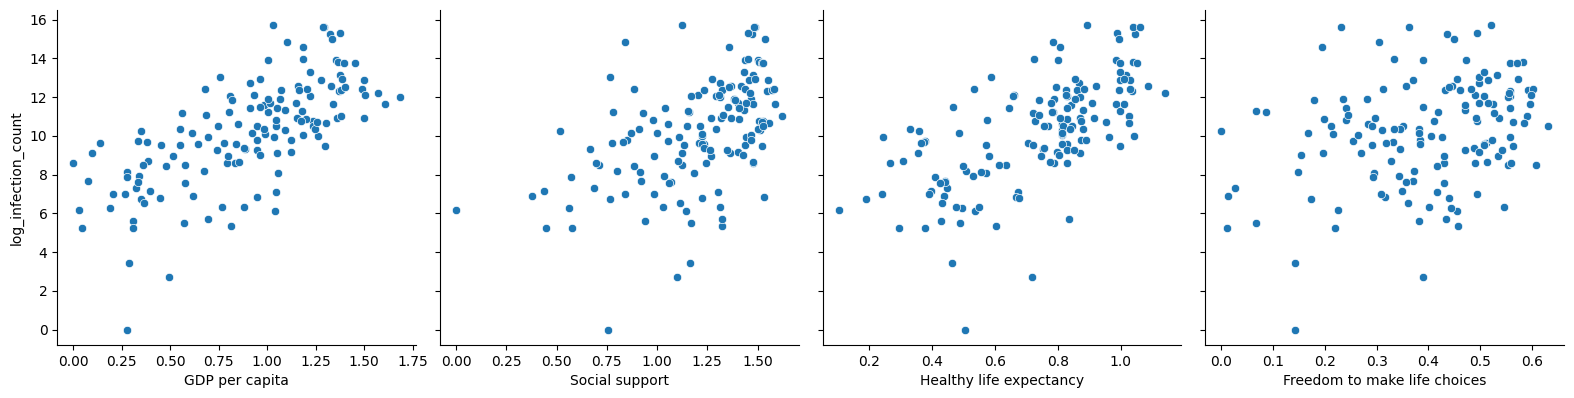

In [25]:
#Pair Plot
data['log_infection_count'] = np.log(data['Total Infections'])
sns.pairplot(data, x_vars=['GDP per capita', 'Social support', 'Healthy life expectancy',
                           'Freedom to make life choices'],
             y_vars='log_infection_count',
             height=4,
             aspect=1,
             kind='scatter')
plt.show()

Interpretation :

All the graphs are weakly positively correlated with target variable.

### 3. Regression Plot

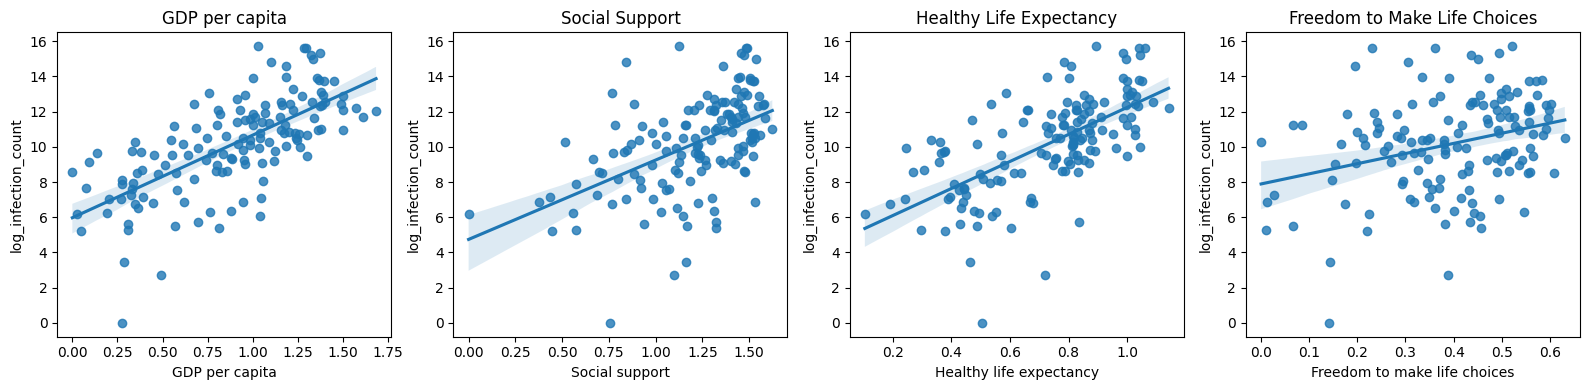

In [26]:
#Regression Plot
# Set up a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# Plot each regression plot on a separate subplot
sns.regplot(x='GDP per capita', y='log_infection_count', data=data, ax=axes[0])
axes[0].set_title('GDP per capita')
sns.regplot(x='Social support', y='log_infection_count', data=data, ax=axes[1])
axes[1].set_title('Social Support')
sns.regplot(x='Healthy life expectancy', y='log_infection_count',
            data=data,
            ax=axes[2])
axes[2].set_title('Healthy Life Expectancy')
sns.regplot(x='Freedom to make life choices', y='log_infection_count',
            data=data,
            ax=axes[3])

axes[3].set_title('Freedom to Make Life Choices')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Interpretation :

GDP per capita and Healthy life expectancy are weakly positively correlated
with target variable.

### 4. Distribution of Target Variable

<ipython-input-27-94ef63c433b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_infection_count'])


<Axes: xlabel='log_infection_count', ylabel='Density'>

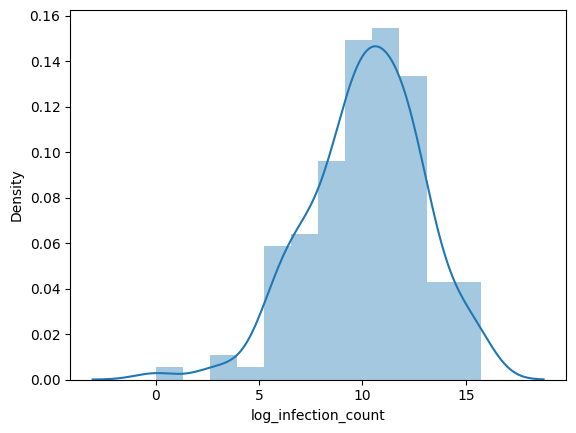

In [27]:
# Distribution of the target variable
data['log_infection_count'] = np.log(data['Total Infections'])
sns.distplot(data['log_infection_count'])

Interpretation :

Distribution is slightly left skewed

### 5. Check Outliers

<Axes: ylabel='Total Infections'>

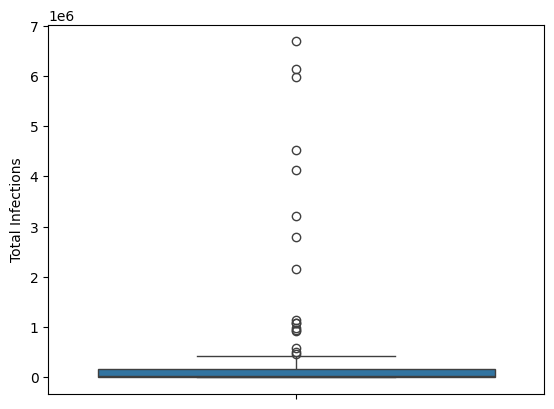

In [28]:
# Checking Outliers
data.head()
sns.boxplot(data['Total Infections'])

Interpretation :

There are many outliers present in the dataset

In [29]:
#Dropping irrelevent column
remove_columns = ["log_infection_count"]
data.drop(remove_columns, axis=1, inplace=True)
data.head()

,Total Infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,28462.0,0.350,0.517,0.361,0.000,0.025
Albania,17864.0,0.947,0.848,0.874,0.383,0.027
Algeria,74325.0,1.002,1.160,0.785,0.086,0.114
Argentina,84105.0,1.092,1.432,0.881,0.471,0.050
Armenia,40610.0,0.850,1.055,0.815,0.283,0.064


### 6. Heatmap

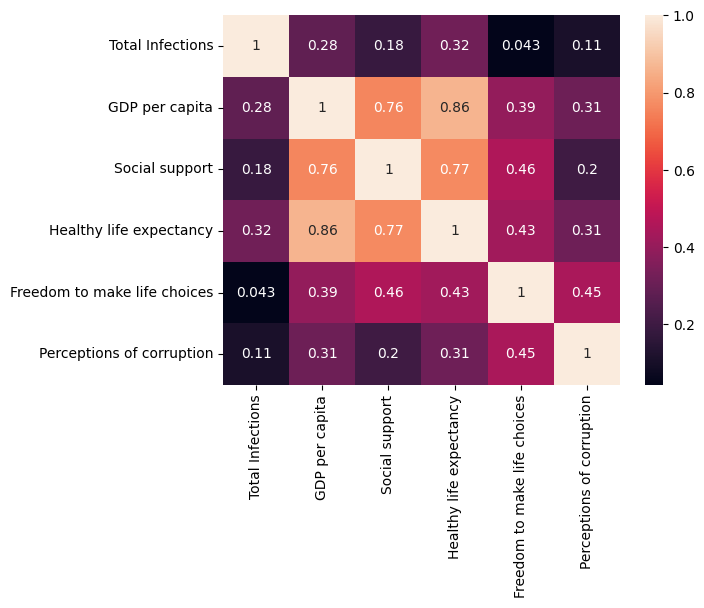

In [30]:
#Heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

**Interpretation:**

Healthy life expectancy seems to be most correlated(but weakly) with total
infections compared to other independent variables.

## MACHINE LEARNING :  BUILDING PREDICTIVE MODEL AND TESTING USING MULTIPLE LINEAR REGRESSION

In [31]:
#Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
# create feature and target vectors
x = data[['GDP per capita', 'Social support', 'Healthy life expectancy',
                  'Freedom to make life choices']]
y = data['Total Infections']

#train-test split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=100)



In [33]:
# Define Multiple Linear Regression Model
mlr = LinearRegression()

# fit the model
mlr.fit(x_train, y_train)

#print intercepts and coefficients
print("Intercept Value:", mlr.intercept_)
# pair the feature names with the coefficients
print("Other Coefficients:", list(zip(x.columns, mlr.coef_)))


Intercept Value: -134524.67717574624
Other Coefficients: [('GDP per capita', 272329.25260819617), ('Social support', -732709.7723702246), ('Healthy life expectancy', 1724646.3974207772), ('Freedom to make life choices', -306889.91130496183)]


In [34]:
#predict for test data
y_pred_mlr = mlr.predict(x_test)

print("Prediction for test set:", y_pred_mlr)
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':mlr.predict(x_test)})


Prediction for test set: [ 516627.33696103  549742.57482286  627047.76705019  519714.3196811
 -280412.86639126  655140.23551356  382076.80776309  406788.21951885
  422413.86373857  688100.71152579  330893.86359747 -215106.22503947
  290206.00985003  731025.51202748  681229.93838944  -93601.014
  485980.81944443  809524.51378545  848613.27182111  314134.25214808
  539529.81085346  212800.30364683   79281.35781691   52911.35873529
  414019.42131276  496686.27698456  737916.99081618  576726.12682345
  699436.27084722]


In [35]:

print("\n----------------Actual vs Predicted Value---------------")
print(mlr_diff)



----------------Actual vs Predicted Value---------------
                        Actual value  Predicted value
Poland                      251454.0    516627.336961
Kuwait                       55693.0    549742.574823
Bosnia and Herzegovina       36234.0    627047.767050
Slovakia                     31703.0    519714.319681
Mozambique                    1118.0   -280412.866391
Chile                       282177.0    655140.235514
Vietnam                      10708.0    382076.807763
Colombia                    107654.0    406788.219519
Venezuela                     8141.0    422413.863739
Belgium                    1082648.0    688100.711526
Rwanda                        4844.0    330893.863597
Zimbabwe                       671.0   -215106.225039
Ukraine                     140485.0    290206.009850
Morocco                      75625.0    731025.512027
United Kingdom             3206716.0    681229.938389
Guinea                       16059.0    -93601.014000
Sri Lanka               

In [36]:
#predict for unseen data
pred_vals = mlr.predict([[0.9, 0.6, 0.55, 0.78]])
print(f'R Predicted Value: {pred_vals}')


R Predicted Value: [380127.17451305]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:

#Evaluation metrices

r_squared = mlr.score(x, y) * 100

print('R squared value of the model: {:.2f}'.format(r_squared))
y_pred_mlr = mlr.predict(x_test)

mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred_mlr)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred_mlr)
root_mean_squared_error = np.sqrt(mean_squared_error)

print('Mean Absolute Error:', mean_absolute_error)
print('Mean Square Error:', mean_squared_error)
print('Root Mean Square Error:', root_mean_squared_error)

R squared value of the model: 11.24
Mean Absolute Error: 610685.4550839054
Mean Square Error: 1343126647727.9663
Root Mean Square Error: 1158933.4095313528


**Interpretations:**

• Intercept: The intercept represents the predicted value of the dependent variable when all predictor variables are zero. In this case, it’s -134524.68.

• GDP per capita coefficient: A one-unit increase in GDP per capita is associated with an increase of approximately 272329.25 in the dependent variable.

• Social support coefficient: A one-unit increase in social support is associated with a decrease of approximately 732709.77 in the dependent variable.

• Healthy life expectancy coefficient: A one-unit increase in healthy life expectancy is associated with an increase of approximately 1724646.40 in the dependent variable.

• Freedom to make life choices coefficient: A one-unit increase in freedom to make life choices is associated with a decrease of approximately 306889.91 in the dependent variable.

• R Predicted Value: The predicted value of the dependent variable for the entire test set is 380127.17.

• R squared value: The R squared value of 11.24% indicates that approximately 11.24% of the variance in the dependent variable is explained by the independent variables in your model.

• Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is 610685.46.

• Mean Square Error (MSE): The average squared difference between the predicted and actual values is 1343126647727.97.

• Root Mean Square Error (RMSE): The square root of MSE is 1158933.41, representing the average magnitude of the errors in the predicted values.

## CONCLUSION


In summary, the study on how COVID-19 rates relate to World happiness index shows that the response variable is very slightly positively dependent on chosen predictor variables and hence the model doesn’t explain much (low R squared at 11.24%). The model’s predictions differ a lot from the actual values, suggesting it might not be the best fit for our data. This could be because:

```
-Model not capturing genuine predictor relationships.
-Predictions stray, compromising accurate dependent variable forecasts.
-Negative predictions, a sign of model instability.
-High coefficient magnitudes suggest potential multicollinearity issues.
-Outliers significantly disrupt regression coefficients and prediction accuracy.
```